In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Basics of plotting

Matplotlib is a plotting package written in Python. It can produce any figure, from quick visualization to publishable figures. For example, the research article that led to the 2017 Nobel Prize contains [this figure](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.116.061102), made in Matplotlib.

Plotting with Matplotlib always involves three steps:

1. Create a space in which the plotting will be presented; 
2. Plot your data;
3. Render the figure and show/save.

Here is a trivial example of those steps:

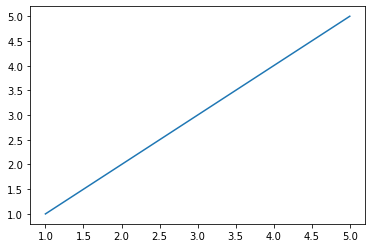

In [3]:
# Create a space (empty figure)
plt.figure()

# Plot data
plt.plot([1,2,3,4,5], [1,2,3,4,5])

# Render the plot (i.e. draw it)
plt.show()

# Plot formatting

The second step in our guide, "plot your data;", is where most of the action happens. Plot formatting is very important for other people to understand your plots. Let's create some random data and play around with formatting.

Our data will have the following form:
$$
    y(t) = \sin(\frac{\pi t}{2}) + n(t)
$$

where $n(t)$ is some random noise

In [4]:
t = np.linspace(start = 0, stop = 10, num = 512)
y = np.sin(1/2 * np.pi * t)
n = 0.1 * np.random.normal(size = t.shape)

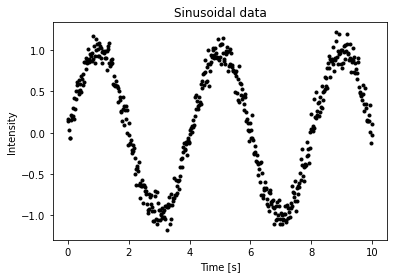

In [5]:
plt.figure()

# The plt.plot() function can take three arguments
# First two arguments are x and y
# Third argument is a style
# In this case, 'k.' means black ('k') points ('.')
plt.plot(t, y + n, 'k.')
plt.title('Sinusoidal data')
plt.xlabel('Time [s]')
plt.ylabel('Intensity')

plt.show()

# Plotting interface: quick vs. full

The interface for plotting, using `plt.<...>` functions, is the quick interface. Let's see what the full interface version of the previous figure looks like:

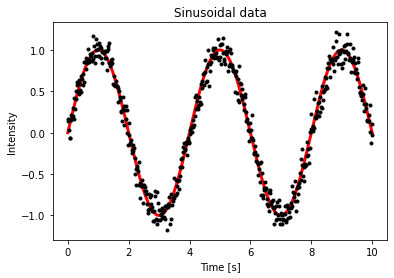

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 1) # Create an empty figure space with 1 row of axes and 1 column of axes

# Axes (like `ax`) are where the plotting and formatting happens.
# Soon, we'll have more than one of them!
ax.plot(t, y, 'r-', lw=3)
ax.plot(t, y + n, 'k.')
ax.set_title('Sinusoidal data')
ax.set_xlabel('Time [s]')
ax.set_ylabel('Intensity')

plt.show()

# Subplots

Learning the somewhat awkward __full__ interface comes with great power: the ability to make multiple subplots and control them easily.

Let's plot our data $y(t) + n(t)$ and show the noise $n(t)$ below it

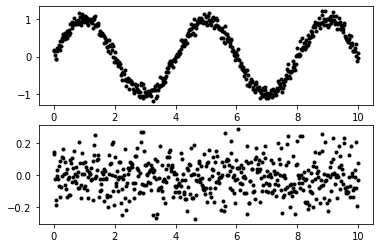

In [8]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1) # We want two rows of plots

ax1.plot(t, y + n, 'k.')

ax2.plot(t, n, '.k')

plt.show()

Again, we should format our plots. However, by using the __full__ interface, we can format each subplot independently.

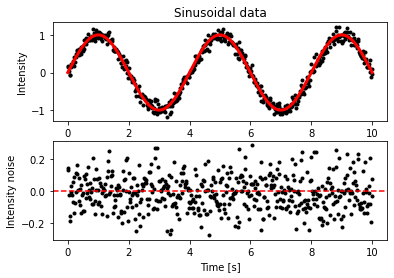

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1) # We want two rows of plots

ax1.plot(t, y + n, 'k.')
ax1.plot(t, y, 'r-', lw=3)
ax1.set_title('Sinusoidal data')
ax1.set_ylabel('Intensity')

ax2.plot(t, n, '.k')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Intensity noise')
ax2.axhline(xmin=0, xmax=10,c='r', ls='--')
plt.show()

# Bonus: residuals statistics

Good residuals should be normally distributed. Is it the case here?

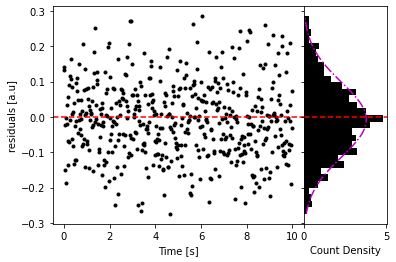

In [32]:
from scipy.stats import norm
# Trick: use the 'sharey = True' parameter
#        to ensure that both subplots always have the 
#        same vertical range
# gridspec_kw is just to make things look nice. Not important
fig, subplots = plt.subplots(1, 2, sharey = True, 
                             gridspec_kw = {'width_ratios': [3,1], 
                                            'wspace': 0})
residuals, hist = subplots

residuals.plot(t, n, '.k')
residuals.set_xlabel('Time [s]')
residuals.set_ylabel('residuals [a.u]')
residuals.axhline(0, color = 'r', linestyle = '--') 

# orient the histogram horizontally
# to match the statistics of the residuals
hist.hist(n, bins = 30, density=True, orientation = 'horizontal', color = 'k')

mean = np.mean(n)
variance = np.var(n)
sigma = np.sqrt(variance)
x = np.linspace(min(n), max(n), 100)
hist.plot(norm.pdf(x, mean, sigma), x, 'm-.')

hist.axhline(0, color = 'r', linestyle = '--')
hist.set_xlabel('Count Density')
plt.show()